<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-ninivenus/blob/main/Chenxin%20Sun1_Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name:**Chenxin Sun

**Student Number:**400582270

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file.

* Load the dataset as a pandas data frame and display the first few rows. (Note: you may upload it to your Colab storage space and load it from there.)

    * How many features (columns) and records (rows) are in the dataset?

In [57]:
import pandas as pd
df = pd.read_excel('/content/Nata Supermarkets1.xlsx')
df.to_csv('/content/Nata_Supermarkets.csv', index=False)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [58]:
df.shape

(2240, 29)

The dataset has 2240 records (rows) and 29 features (columns).

## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [59]:
missing_values = df.isnull().sum()

print("✅ Missing values per column:")
print(missing_values[missing_values > 0])

✅ Missing values per column:
Income    24
dtype: int64


In [60]:
total_missing = df.isnull().sum().sum()
print(f"Total missing entries in dataset: {total_missing}")

Total missing entries in dataset: 24


Only the Income column had missing values (24 entries).

In [61]:
before_missing_income = int(df['Income'].isna().sum())
median_income = float(df['Income'].median())

df['Income'].fillna(median_income, inplace=True)

after_missing_income = int(df['Income'].isna().sum())
print("Income missing before:", before_missing_income)
print("Median used to fill:", median_income)
print("Income missing after:", after_missing_income)

Income missing before: 24
Median used to fill: 51381.5
Income missing after: 0


/tmp/ipython-input-4122742546.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(median_income, inplace=True)


I chose to fill the missing values in Income using the median. Median is robust to outliers, helps preserve all rows (compared to dropping), and Income is numeric, which makes imputation appropriate for downstream analysis.

## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [62]:
unique_counts = df.nunique()

In [63]:
constant_cols = unique_counts[unique_counts == 1].index.tolist()
print("Columns with constant values:")
print(constant_cols)

Columns with constant values:
['Z_CostContact', 'Z_Revenue']


In [64]:
df = df.drop(columns=constant_cols)

In [68]:
print("Number of columns remaining after dropping constants:", df.shape[1])

Number of columns remaining after dropping constants: 27


## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [69]:
from datetime import datetime
import pandas as pd

In [70]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [71]:
today = datetime.today()

In [72]:
df['Customer_Days'] = (today - df['Dt_Customer']).dt.days

In [73]:
print("Added new column 'Customer_Days':")
print(df[['Dt_Customer', 'Customer_Days']].head())

Added new column 'Customer_Days':
  Dt_Customer  Customer_Days
0  2012-04-09           4944
1  2014-08-03           4098
2  2013-08-21           4445
3  2014-10-02           4038
4  2014-01-19           4294


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

In [75]:
edu_counts = df['Education'].value_counts()

marital_counts = df['Marital_Status'].value_counts()

print("Education counts:\n", edu_counts)
print("\nMarital Status counts:\n", marital_counts)

Education counts:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital Status counts:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


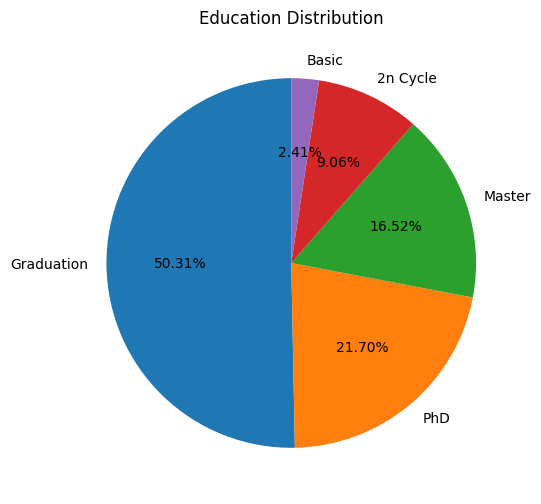

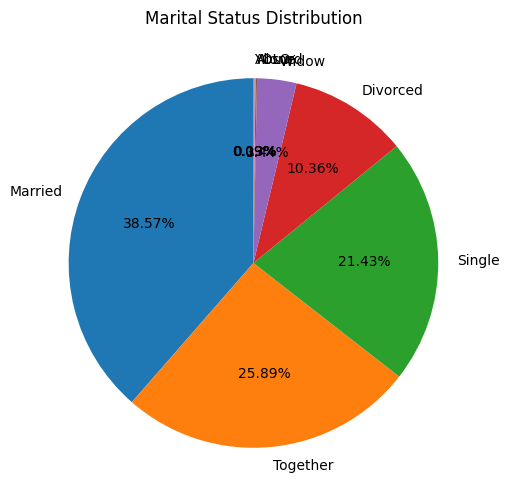

In [78]:
import matplotlib.pyplot as plt

#  Education pie chart
plt.figure(figsize=(6,6))
edu_counts.plot.pie(autopct='%.2f%%', startangle=90)
plt.title('Education Distribution')
plt.ylabel('')
plt.show()

#  Marital_Status pie chart
plt.figure(figsize=(6,6))
marital_counts.plot.pie(autopct='%.2f%%', startangle=90)
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()

Most customers are highly educated, with the majority holding a Graduation or PhD degree.
In terms of marital status, most customers are married or living together.
These findings suggest that Nata Supermarkets’ main target demographic consists of well-educated, middle-aged professionals who are likely to be financially stable and shop for family needs.

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

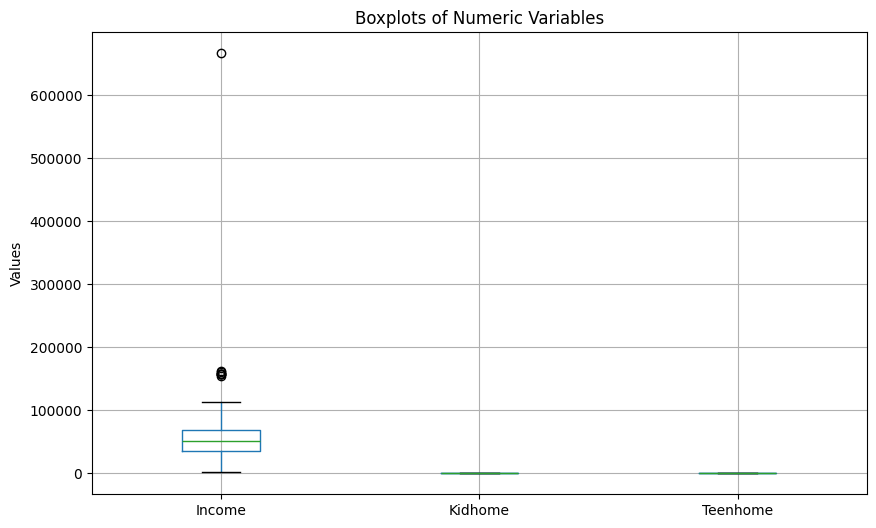

In [79]:
import matplotlib.pyplot as plt

num_cols = ['Income', 'Kidhome', 'Teenhome']

plt.figure(figsize=(10,6))
df[num_cols].boxplot()
plt.title('Boxplots of Numeric Variables')
plt.ylabel('Values')
plt.show()

The boxplots show that income levels vary widely among Nata’s customers, with several high-income outliers, suggesting a few very wealthy clients.
Most households have 0 or 1 child, and very few have teenagers at home.
This indicates that the typical Nata customer likely comes from a small, financially stable household with limited dependents.

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [80]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

total_spending = df[spending_cols].sum().sort_values(ascending=False)

print("Total spending by product:")
print(total_spending)


Total spending by product:
MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64


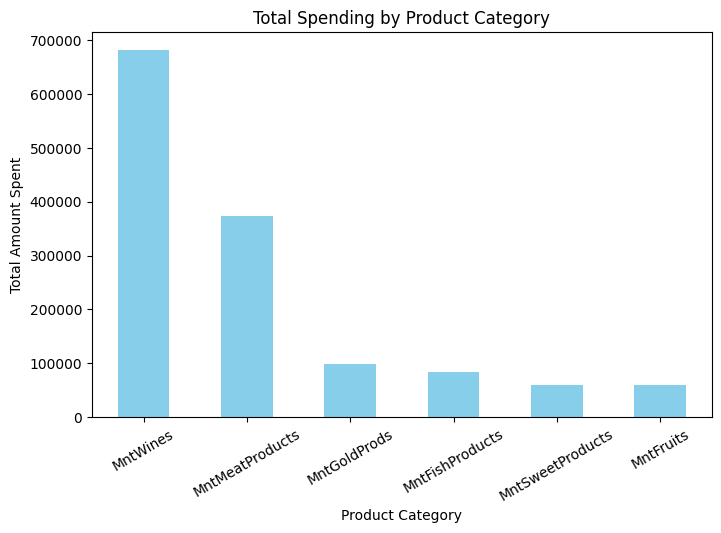

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
total_spending.plot(kind='bar', color='skyblue')
plt.title('Total Spending by Product Category')
plt.ylabel('Total Amount Spent')
plt.xlabel('Product Category')
plt.xticks(rotation=30)
plt.show()

In [82]:
top_product = total_spending.idxmax()
print(f"The product with the highest total spending is: {top_product}")

The product with the highest total spending is: MntWines


Customers spend the most on Wines, followed by Meat Products and Gold Products.
This suggests that Nata’s customers are likely middle-to-upper income individuals who enjoy quality food and premium beverages.

## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

I used Generative AI (ChatGPT) to clarify some coding concepts in Pandas, understand data-cleaning steps, and verify the accuracy of my Python syntax. All final analyses and interpretations were completed by me.